# Aula do dia 28/10

## Virtual Environment Setup

Usamos uma venv chamada **environment** para o ambiente de Python.

Para ativá-la no Windows, usamos no command prompt (se bocos estiver em Documents):

    cd Documents\bocos
    environment\Scripts\activate
    code .

## Primeiro Problema
Dado um número $n \in \mathbb{N}$ implementar função $f(n)$ que retorna maior divisor primo de $n$.

**Implementação primária**

In [ ]:
# Função que retorna o menor divisor de n
def d(n):
    for i in range(2,n,1):
        if(n%i==0):
            return i
    return n

# Função que retorna o maior divisor primo de n
def f(n):
    l = d(n)
    if(l==n):
        return n
    else:
        return f(n//l)
print(f(10000000000))

# Aula do dia 4/11

## Objetivos
1. Implementar função `primos_ate(n)` que retorna uma lista com todos os números primos menores que n.
2. Usar essa implementação para resolver o **Problema 1** definindo função `maior_fator_primo_de(n)`
3. (Não objetivo) Fazer função `primos_ate(n)` um pouco mais eficiente.
4. Começar a lib `funcionario.py` contendo funções úteis para cálculos no futuro.

In [ ]:
def maior_fator_primo_de(n):
    ps = primos_ate(n)
    for p in ps[::-1]:
        if n % p==0:
            return p
    return n

# Algoritmo "burro"
def primos_ate(n):
    return [p for p in range(n) if e_primo(p)]

def e_primo(n):
    if n in [0,1]:
        return False
    for i in range(2,n):
        if(n%i==0):
            return False
    return True

# Algoritmo "" eficiente ""
def primos_ate_2(n):
    ns = list(range(2,n))
    idx = 0
    while idx < len(ns):
        for i in range(0,n,ns[idx]):
            if i in ns and i!= ns[idx]:
                ns.remove(i)
        idx+=1
    return ns

# Algoritmo Eratosteles (eficiente pra kct)
def primos_ate_3(n):
    e = eratosteles(n)
    return [e[i] for i in range(n) if e[i]!=False]

def eratosteles(n):
    flags = list(range(n+1))
    flags[0]=False
    flags[1]=False
    for k in flags:
        if k==False:
            continue
        else:
            for idx in range(2*k,n+1,k):
                flags[idx] = False
    return flags

## Eficiência: 

| N     | Burro | "Eficiente" | Eratosteles | 
| ----- | ----  | ----        | ----        | 
| $10^4$ |     0.3s |           0.6s |     0       
| $5 \times 10^4$ |     6.4s |     16.6s        |     0       
| $10^5$          |     25.6s |    72.9s       |    0
| $10^6$          |      ??   | ??             | 0.2s 
| $10^7$          |  ??       | ??             | 2.8s 

## Homework: Treinar os básicos de programação 
- `while` 
- `if` 
- `else` 
- `elif`
- `range` 
- `lists`

Implmentar funções que retornem:

1. `f1(k1,k2,N)` $\left\{n:\ (k_1|n \text{ ou }  k_2|n)  \text{ e }n \le N\right\}$

2. `f2(k1,k2,N)` $\left\{n:\ (k_1|n \text{ e }  k_2|n)   \text{ e }n \le N\right\}$

3. `f3(ks,N)` 1. e 2. para tuplas gerais.


In [ ]:
def HW1(k1,k2,N):
    results = []
    for n in range(N):
        if n%k1 == 0 or n%k2 == 0:
            results.append(n)
    return results

def HW2(k1,k2,N):
    results = []
    for n in range(N):
        if n%k1 == 0 and n%k2 == 0:
            results.append(n)
    return results

def HW3b(ks, N):
    results = []
    for n in range(N):
        for k in ks:
            if n%k != 0:
                break
            results.append(n)
            break
    return results

def HW3a(ks, N):
    results = []
    for n in range(N):
        flag = True
        for k in ks:
            if n%k != 0:
                flag = False
        if flag:
            results.append(n)
    return results

In [ ]:
# Tentativa marota usando List Comprehension aka inglês

def Hw1(k1,k2,N):
    return [n for n in range(N+1) if n%k1==0 and n%k2==0]

def Hw2(k1,k2,N):
    return [n for n in range(N+1) if n%k1==0 or n%k2==0]

def Hw3a(ks,N):
    return [n for n in range(N+1) if any([n%k==0 for k in ks])]

def Hw3b(ks,N):
    return [n for n in range(N+1) if all([n%k==0 for k in ks])]


print(Hw3a([2,3,5],60))

# Aula do dia 11/11

## Objetivos
- Qual a proporção de primos na sequência de Fibonacci

In [40]:
def eratosteles(n):
    flags = list(range(n+1))
    flags[0]=False
    flags[1]=False
    for k in flags:
        if k==False:
            continue
        else:
            for idx in range(2*k,n+1,k):
                flags[idx] = False
    return flags

def fib(n):
    a = 0
    b = 1
    while n>0:
        a,b = b,a+b
        n-=1
    return b

def lista_fib(n):
    results = []
    a = 0 
    b = 1
    while n>0:
        a,b = b,a+b
        n-=1
        results.append(a)
    return results

def e_primo(n):
    if n==1:
        return False
    for i in range(2,int(n**0.5),1):
        if n%i==0:
            return False
    return True

def primos_em_lista(L):
    return [n for n in L if e_primo(n)]

def proporcao_primos(L):
    cont = 0
    n = len(L)
    for i in L:
        if e_primo(i):
            cont+=1
    return cont/n

def primos_ate(n):
    e = eratosteles(n)
    return [e[i] for i in range(n) if e[i]!=False]

# Aula do dia 25/11

- `lista_fib(n)` retorna `[1, 1, 2, 3, ... ,f_n]`
- `prop_primos(L)` retorna `#{primos em L}/#L`

[1.0, 0.5, 0.6666666666666666, 0.75, 0.8, 0.8333333333333334, 0.8571428571428571, 0.875, 0.8888888888888888, 0.9, 0.8181818181818182, 0.8333333333333334, 0.7692307692307693, 0.7857142857142857, 0.7333333333333333, 0.75, 0.7058823529411765, 0.7222222222222222, 0.6842105263157895, 0.7, 0.6666666666666666, 0.6363636363636364, 0.6086956521739131, 0.625, 0.6, 0.6153846153846154, 0.5925925925925926, 0.5714285714285714, 0.5517241379310345, 0.5666666666666667, 0.5483870967741935, 0.5625, 0.5454545454545454, 0.5294117647058824, 0.5142857142857142, 0.5277777777777778, 0.5135135135135135, 0.5263157894736842, 0.5128205128205128, 0.5, 0.4878048780487805, 0.5, 0.4883720930232558, 0.5, 0.4888888888888889, 0.4782608695652174, 0.46808510638297873, 0.4791666666666667, 0.46938775510204084, 0.48, 0.47058823529411764, 0.46153846153846156, 0.4528301886792453, 0.46296296296296297, 0.45454545454545453, 0.44642857142857145, 0.43859649122807015, 0.43103448275862066, 0.423728813559322, 0.43333333333333335, 0.426

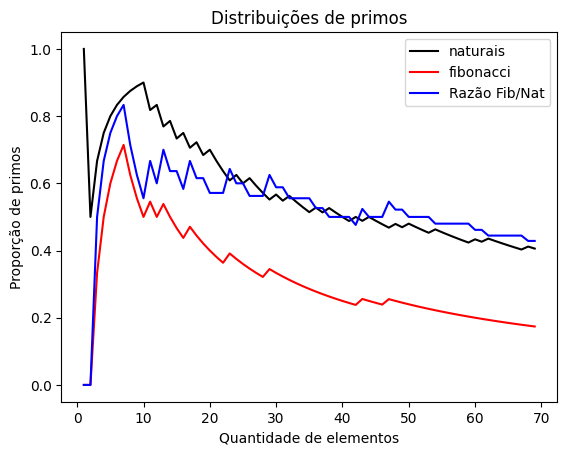

In [90]:
import matplotlib.pyplot as plt

fig,ax = plt.subplots()
n= 70
Primos = primos_ate(n)
Fibo = lista_fib(n)
X = range(1,n,1)
Y1 = [proporcao_primos(range(0,n,1)) for  n in X]
Y2 = [proporcao_primos(Fibo[0:n]) for n in X]
Y3 = [Y2[i]/Y1[i] for i in range(len(Y1))]
print(Y1)
ax.plot(X,Y1,"-",color='k', label='naturais')
ax.plot(X,Y2,"-",color='r', label = 'fibonacci')
ax.plot(X,Y3,"-",color='b', label = 'Razão Fib/Nat')
ax.set_title("Distribuições de primos")
ax.legend()
ax.set_xlabel("Quantidade de elementos")
ax.set_ylabel("Proporção de primos")
plt.show()

## Dever de casa
-`circulo(centro,raio,n_pts)`
-`triangulo(centro,raio,angulo)`
-`polígono de n lados(centro, raio, angulo, n)`

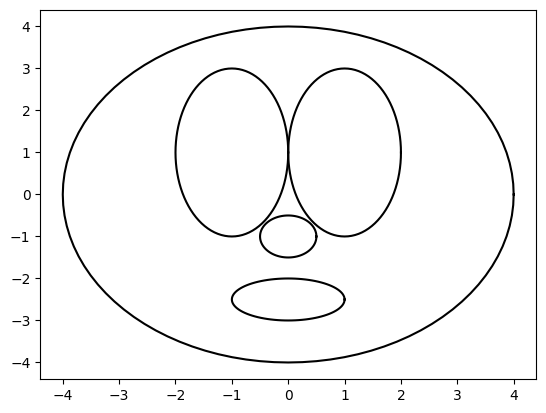

In [8]:
import matplotlib.pyplot as plt
import numpy as np
fig,ax = plt.subplots()

n = 20
raio = 4
centro = (2,1)
N = 100

def circulo(centro,raio,n_pts,angulo=0):
    Xs = [centro[0]+raio*np.cos(2*i*np.pi/n_pts+np.pi*angulo/180) for i in range(n_pts+1)]
    Ys = [centro[1]+raio*np.sin(2*i*np.pi/n_pts+np.pi*angulo/180) for i in range(n_pts+1)]
    return (Xs,Ys)

def elipse(centro,eixox,eixoy,n_pts,angulo=0):
    Xs = [centro[0]+eixox*np.cos(2*i*np.pi/n_pts+np.pi*angulo/180) for i in range(n_pts+1)]
    Ys = [centro[1]+eixoy*np.sin(2*i*np.pi/n_pts+np.pi*angulo/180) for i in range(n_pts+1)]
    return (Xs,Ys)

def plot_circulo(centro,raio,n_pts = 0, precisao = 100, angulo=0 ):
    (PXs,PYs) = circulo(centro,raio,n_pts)
    (Xs,Ys) = circulo(centro,raio,precisao)
    ax.plot(Xs,Ys,'-')
    ax.plot(PXs,PYs,'o')
    ax.plot(centro[0],centro[1],'x')

def plot_poligono(centro,raio,n_pts,angulo=0):
    (PXs,PYs) = circulo(centro,raio,n_pts,angulo)
    ax.plot(centro[0],centro[1],'x')
    ax.plot(PXs,PYs,'-o',color='k')
    ax.plot((centro[0],centro[0]+raio),(centro[1],centro[1]),'-',color='b')
    ax.plot((centro[0],PXs[0]),(centro[1],PYs[0]),color='r')

def plot_carinha():
    centro = [0,0]
    raio = 4
    eixox = 1
    eixoy = 2
    (Pxs,Pys) = circulo([0,0],4,100,0)
    (Qxs,Qys) = elipse([-1,1],eixox,eixoy,100,0)
    (Rxs,Rys) = elipse([1,1],eixox,eixoy,100,0)
    (Sxs,Sys) = elipse([0,-1],eixox=0.5,eixoy=0.5, n_pts=100, angulo=0)
    (Txs,Tys) = elipse([0,-2.5],eixox=1,eixoy=0.5, n_pts=100, angulo=0)
    ax.plot(Pxs,Pys,'-',color='k')
    ax.plot(Qxs,Qys,'-',color='k')
    ax.plot(Rxs,Rys,'-',color='k')
    ax.plot(Sxs,Sys,'-',color='k')
    ax.plot(Txs,Tys,'-',color='k')

plot_carinha()
plt.show()

In [ ]:
l